In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Pra-processing

### Membaca citra dataset ORL

In [21]:
datasetFaces = []

for person in range(1,41):
    temp = []
    
    for pose in range(1,11):
        data = plt.imread('/Users/iamapinn/Developer/UTS Pengolahan CITRA/ORL/'+str(person)+'/ORL_'+str(person)+'_'+str(pose)+'.jpg')
        temp.append(data)
        
    datasetFaces.append(np.array(temp))

datasetFaces = np.array(datasetFaces)
np.save('datasetFacesORL.npy', datasetFaces)

print('Jumlah total dataset:', len(datasetFaces))
print('Ukuran dataset:', datasetFaces.shape)

Jumlah total dataset: 40
Ukuran dataset: (40, 10, 112, 92)


### Visualisasi Dataset

#### Visualisasi semua datasets Person

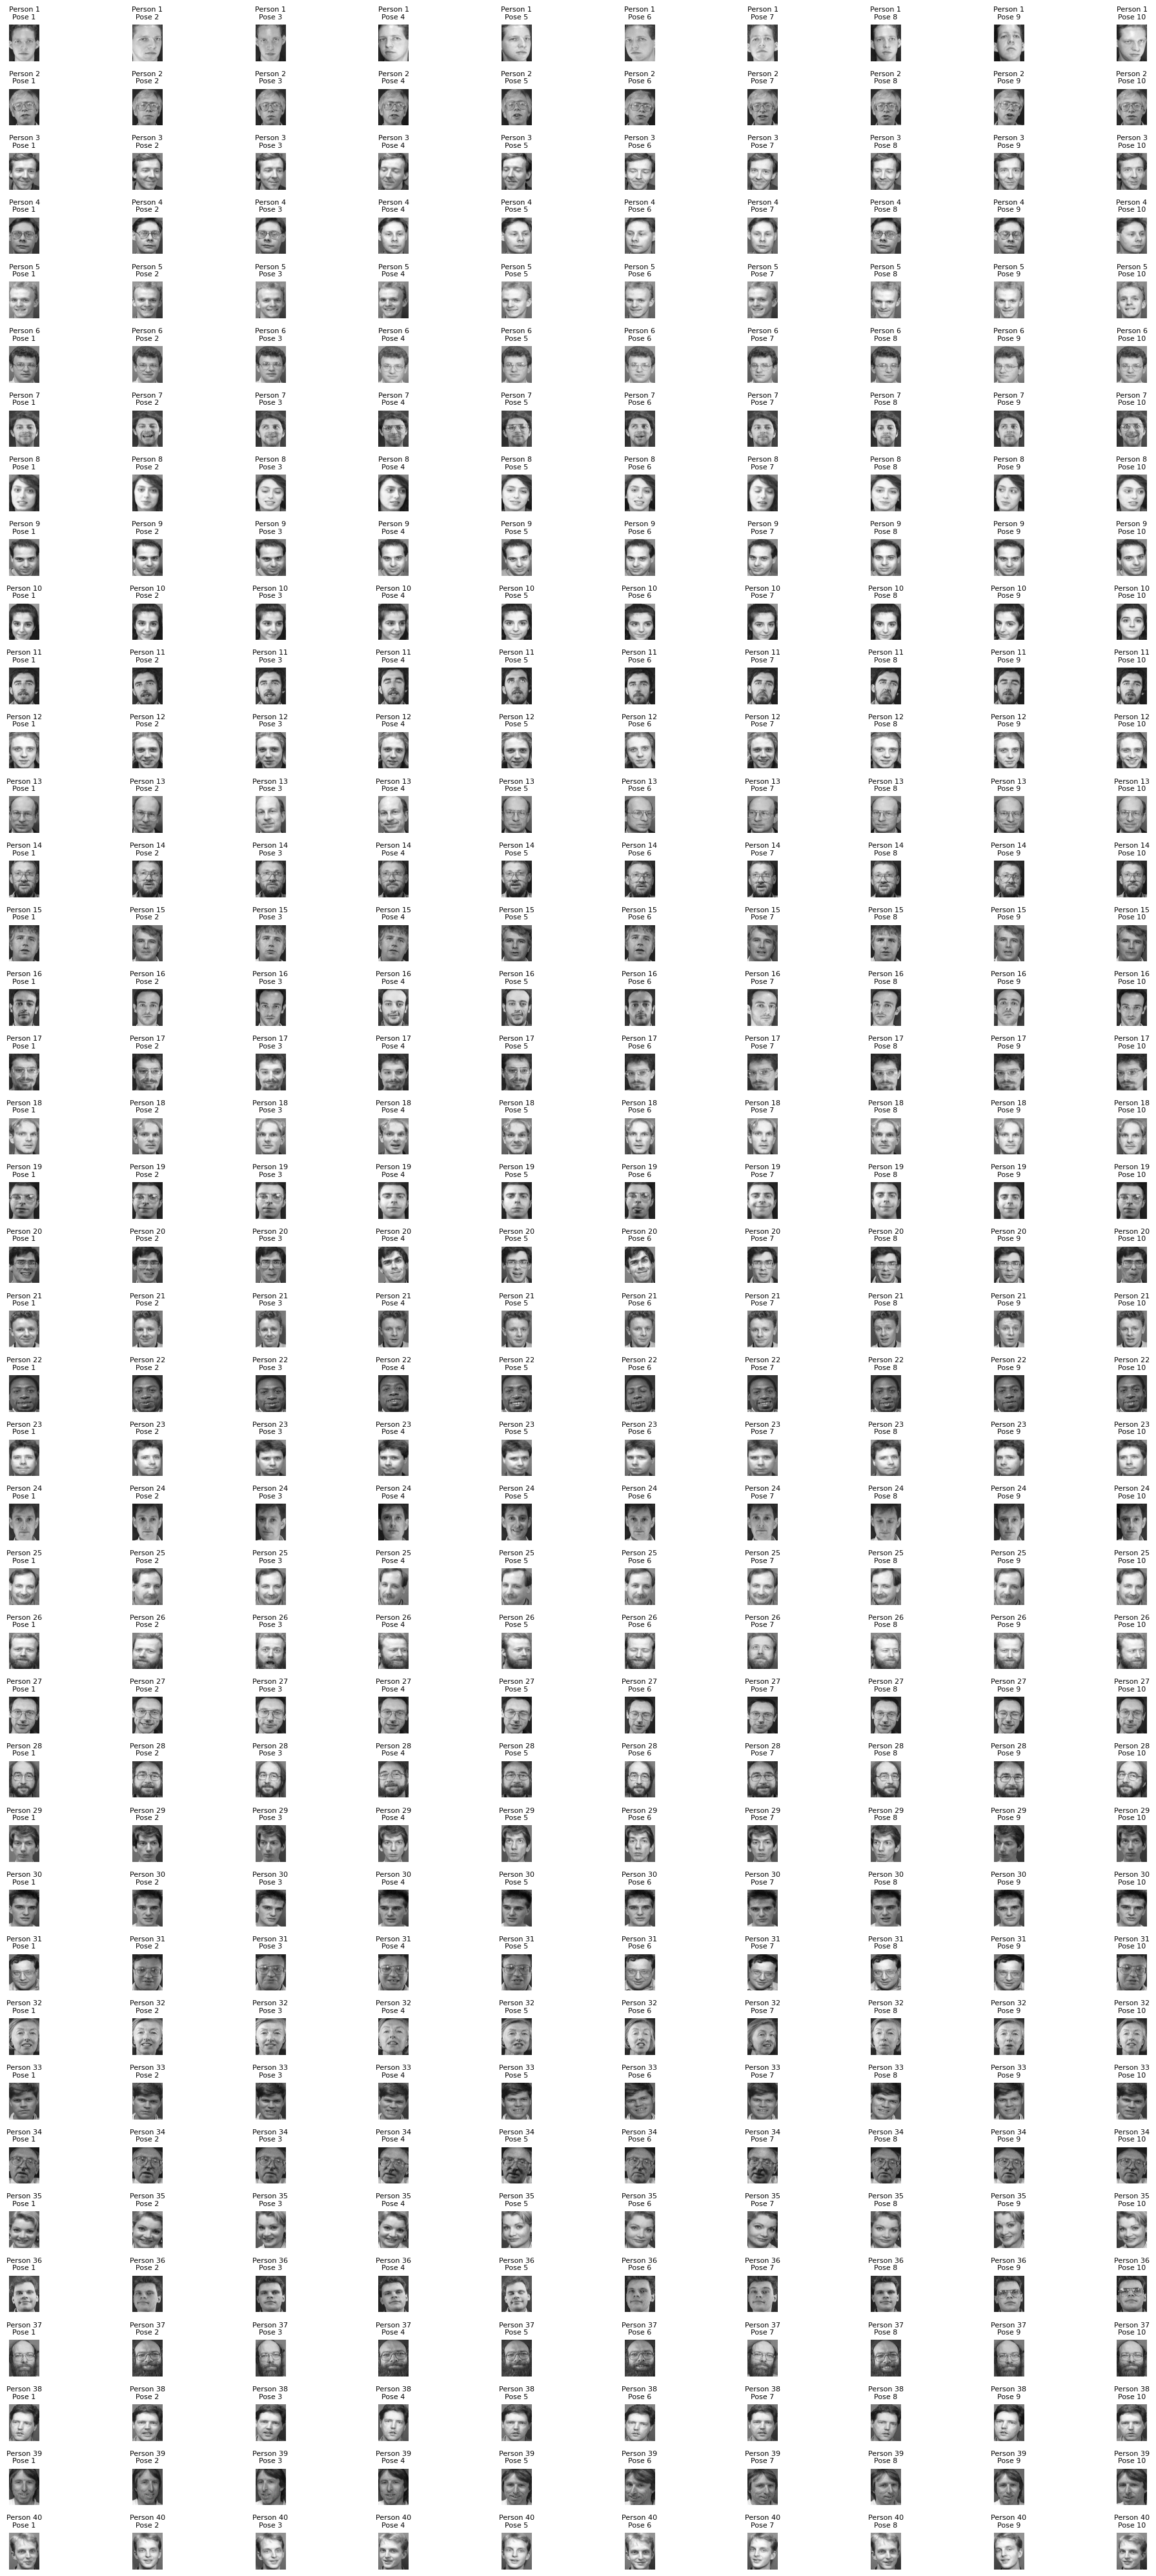

In [30]:
fig, axes = plt.subplots(datasetFaces.shape[0], datasetFaces.shape[1], figsize=(20, 40))

for person in range(datasetFaces.shape[0]):
    for pose in range(datasetFaces.shape[1]):
        axes[person, pose].imshow(datasetFaces[person, pose], cmap='gray')
        axes[person, pose].axis('off')
        axes[person, pose].set_title(f'Person {person + 1}\nPose {pose + 1}', fontsize=8)

plt.tight_layout()
plt.show()

#### Visualisasi Person

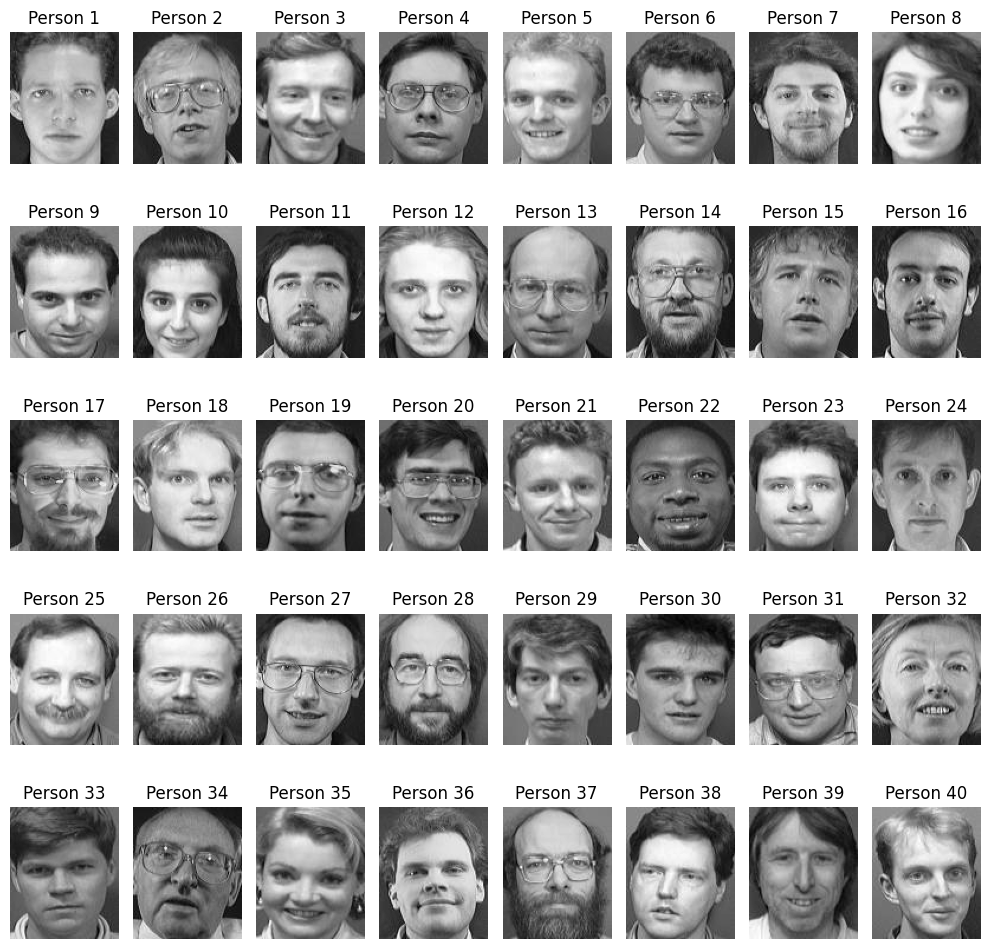

In [34]:
plt.figure(figsize=(10,10))
for person in range(datasetFaces.shape[0]):
    plt.subplot(5,8,person+1)
    plt.imshow(datasetFaces[person][0], cmap='gray')
    plt.title('Person '+str(person+1))
    plt.axis('off')

plt.tight_layout()
plt.show()

## Processing

### Ekstraksi Fitur menggunakan Principal Component Analysis (PCA) yaitu mereduksi jumlah dimensi yang tinggi ke dimensi yang lebih rendah

#### 1. Pembentukan matriks data citra wajah

<p>Langkah pertama yang dilakukan
adalah membentuk matriks data citra
dengan mengambil data pixel setiap
citranya.</p>

In [4]:
datasetFaces = datasetFaces.reshape(400,10304)
datasetFaces = datasetFaces.astype('float32')
# normalisasi data
datasetFaces /= 255

print('Ukuran dataset:', datasetFaces.shape)
# pandas pixel
df = pd.DataFrame(datasetFaces)
df

Ukuran dataset: (400, 10304)


0         1         2         3         4         5         6      \
0    0.188235  0.207843  0.168627  0.168627  0.231373  0.200000  0.152941   
1    0.235294  0.247059  0.243137  0.211765  0.192157  0.207843  0.231373   
2    0.156863  0.117647  0.207843  0.188235  0.215686  0.196078  0.250980   
3    0.262745  0.207843  0.152941  0.141176  0.145098  0.137255  0.129412   
4    0.247059  0.294118  0.294118  0.219608  0.164706  0.192157  0.250980   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.490196  0.482353  0.478431  0.482353  0.490196  0.494118  0.490196   
396  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961   
397  0.482353  0.478431  0.474510  0.478431  0.486275  0.490196  0.486275   
398  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667   
399  0.478431  0.482353  0.490196  0.494118  0.494118  0.490196  0.482353   

        7         8         9      ...     10294     10295     10296  \
0    0.188235  0.211765  0.188235  ...  0.152941  0.156863  0.164706   
1    0.243137  0.274510  0.282353  ...  0.129412  0.117647  0.121569   
2    0.156863  0.156863  0.121569  ...  0.117647  0.121569  0.129412   
3    0.125490  0.137255  0.172549  ...  0.682353  0.674510  0.650980   
4    0.286275  0.243137  0.196078  ...  0.117647  0.117647  0.121569   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.482353  0.490196  0.490196  ...  0.137255  0.141176  0.149020   
396  0.501961  0.509804  0.509804  ...  0.356863  0.356863  0.356863   
397  0.482353  0.474510  0.474510  ...  0.137255  0.133333  0.133333   
398  0.466667  0.474510  0.466667  ...  0.262745  0.352941  0.349020   
399  0.478431  0.486275  0.486275  ...  0.141176  0.121569  0.117647   

        10297     10298     10299     10300     10301     10302     10303  
0    0.172549  0.180392  0.184314  0.180392  0.180392  0.180392  0.180392  
1    0.121569  0.121569  0.121569  0.129412  0.129412  0.129412  0.133333  
2    0.121569  0.117647  0.125490  0.113725  0.113725  0.109804  0.109804  
3    0.623529  0.631373  0.658824  0.549020  0.145098  0.043137  0.105882  
4    0.125490  0.129412  0.129412  0.145098  0.149020  0.149020  0.152941  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.152941  0.149020  0.145098  0.149020  0.152941  0.156863  0.160784  
396  0.356863  0.356863  0.356863  0.360784  0.360784  0.360784  0.364706  
397  0.137255  0.141176  0.145098  0.156863  0.156863  0.156863  0.152941  
398  0.388235  0.364706  0.376471  0.364706  0.360784  0.356863  0.352941  
399  0.137255  0.133333  0.117647  0.141176  0.141176  0.137255  0.137255  

[400 rows x 10304 columns]

#### 2. Pembagian data train dan test

<p>Langkah kedua yang dilakukan
adalah membagi data citra menjadi data train dan data test.</p>

In [5]:
train_size = 0.6  # Split Data dengan pengambilan random

train_idx = np.random.choice(10, int(train_size*10), replace=False)
test_idx =  np.array(list(set(range(10)) - set(train_idx)))

train = []
test = []
for i in range(40):
    for j in range(10):
        if j in train_idx:
            train.append(datasetFaces[i*10+j])
        else:
            test.append(datasetFaces[i*10+j])
            
train = np.array(train)
test = np.array(test)

print('Indeks Data Train:', train_idx)
print('Indeks Data Test:', test_idx)
print('Ukuran train:', train.shape)
print('Ukuran test:', test.shape)

Indeks Data Train: [5 0 4 3 6 1]
Indeks Data Test: [8 9 2 7]
Ukuran train: (240, 10304)
Ukuran test: (160, 10304)


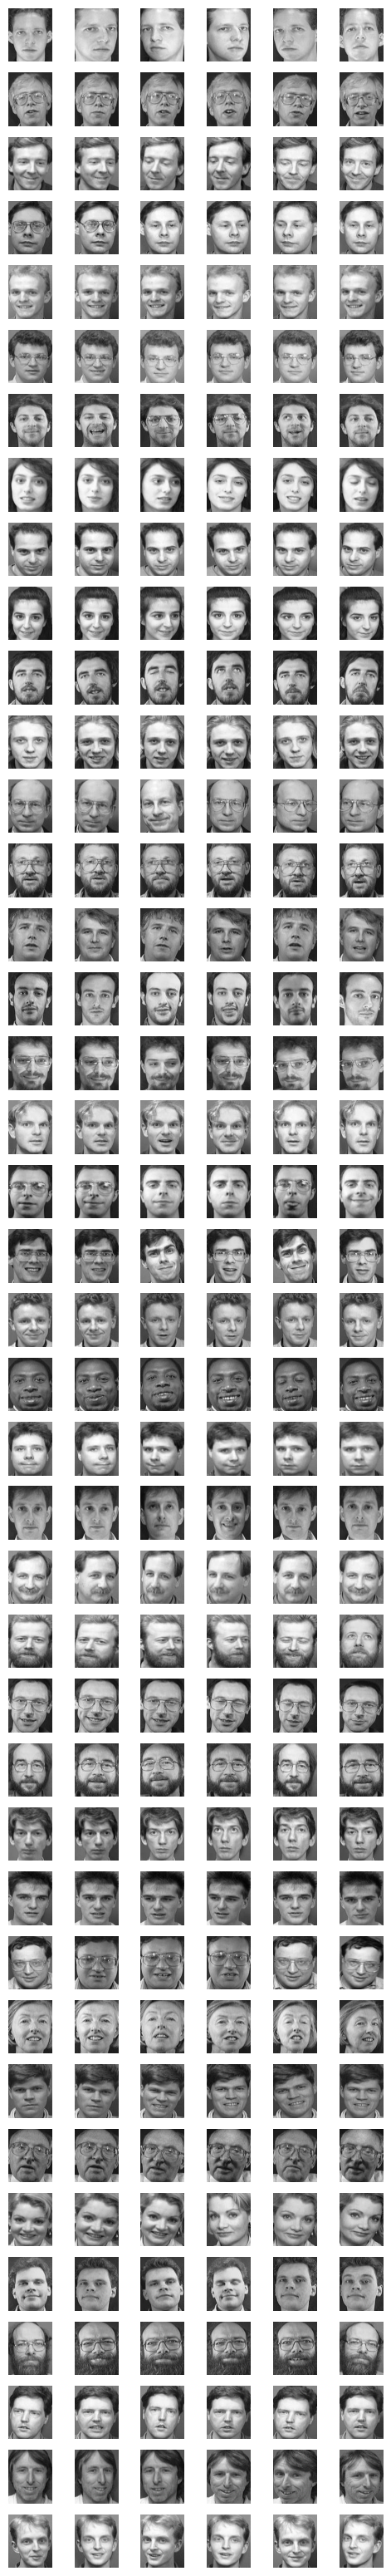

0         1         2         3         4         5         6      \
0    0.188235  0.207843  0.168627  0.168627  0.231373  0.200000  0.152941   
1    0.235294  0.247059  0.243137  0.211765  0.192157  0.207843  0.231373   
2    0.262745  0.207843  0.152941  0.141176  0.145098  0.137255  0.129412   
3    0.247059  0.294118  0.294118  0.219608  0.164706  0.192157  0.250980   
4    0.152941  0.247059  0.094118  0.250980  0.317647  0.305882  0.270588   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961   
236  0.509804  0.494118  0.474510  0.474510  0.486275  0.494118  0.498039   
237  0.498039  0.498039  0.498039  0.501961  0.501961  0.505882  0.505882   
238  0.490196  0.482353  0.478431  0.482353  0.490196  0.494118  0.490196   
239  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961   

        7         8         9      ...     10294     10295     10296  \
0    0.188235  0.211765  0.188235  ...  0.152941  0.156863  0.164706   
1    0.243137  0.274510  0.282353  ...  0.129412  0.117647  0.121569   
2    0.125490  0.137255  0.172549  ...  0.682353  0.674510  0.650980   
3    0.286275  0.243137  0.196078  ...  0.117647  0.117647  0.121569   
4    0.180392  0.223529  0.137255  ...  0.658824  0.650980  0.643137   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.501961  0.517647  0.505882  ...  0.356863  0.352941  0.352941   
236  0.494118  0.482353  0.490196  ...  0.137255  0.141176  0.145098   
237  0.505882  0.498039  0.494118  ...  0.345098  0.345098  0.352941   
238  0.482353  0.490196  0.490196  ...  0.137255  0.141176  0.149020   
239  0.501961  0.509804  0.509804  ...  0.356863  0.356863  0.356863   

        10297     10298     10299     10300     10301     10302     10303  
0    0.172549  0.180392  0.184314  0.180392  0.180392  0.180392  0.180392  
1    0.121569  0.121569  0.121569  0.129412  0.129412  0.129412  0.133333  
2    0.623529  0.631373  0.658824  0.549020  0.145098  0.043137  0.105882  
3    0.125490  0.129412  0.129412  0.145098  0.149020  0.149020  0.152941  
4    0.631373  0.615686  0.603922  0.607843  0.623529  0.572549  0.682353  
..        ...       ...       ...       ...       ...       ...       ...  
235  0.349020  0.349020  0.349020  0.356863  0.352941  0.352941  0.349020  
236  0.141176  0.141176  0.137255  0.141176  0.141176  0.145098  0.149020  
237  0.352941  0.349020  0.345098  0.341176  0.341176  0.341176  0.337255  
238  0.152941  0.149020  0.145098  0.149020  0.152941  0.156863  0.160784  
239  0.356863  0.356863  0.356863  0.360784  0.360784  0.360784  0.364706  

[240 rows x 10304 columns]

In [6]:
# plot data train
fig, ax = plt.subplots(40, int(train_size*10), figsize=(6, 40))
for i in range(40):
    for j in range(int(train_size*10)):
        ax[i, j].imshow(train[i*(int(train_size*10))+j].reshape(112, 92), cmap='gray')
        ax[i, j].axis('off')
plt.show()

df_train = pd.DataFrame(train)
df_train

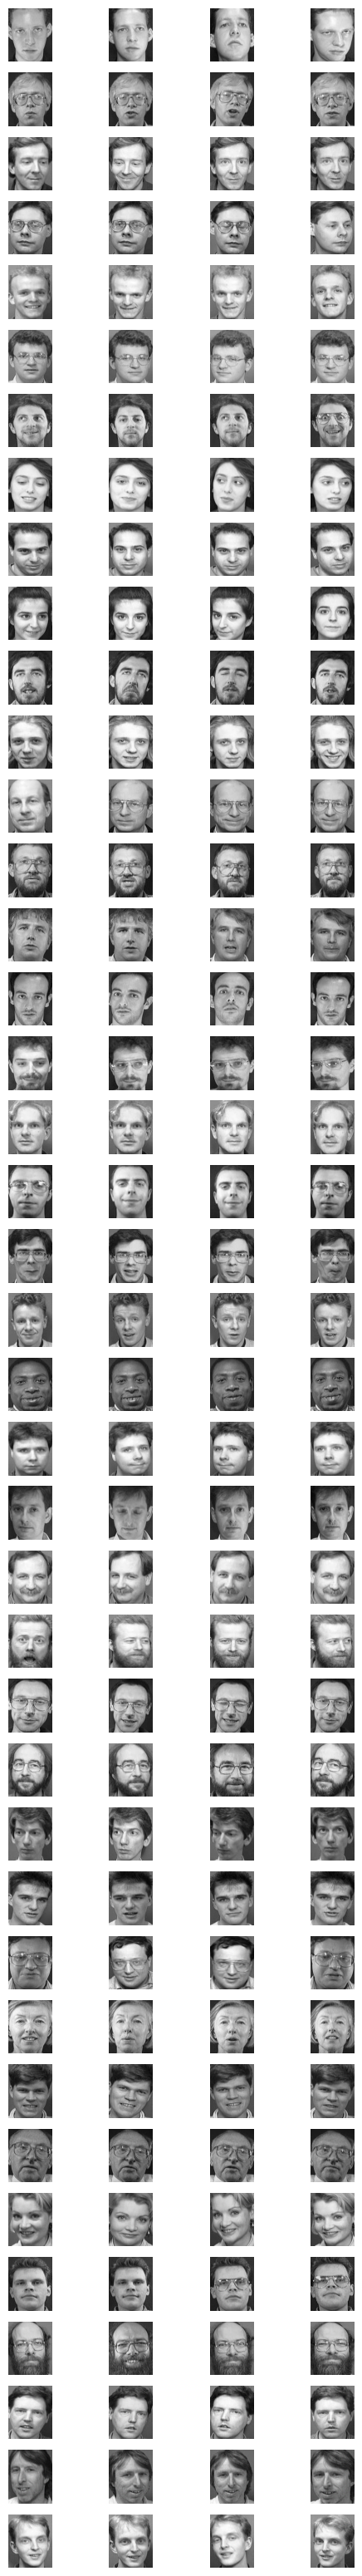

0         1         2         3         4         5         6      \
0    0.156863  0.117647  0.207843  0.188235  0.215686  0.196078  0.250980   
1    0.192157  0.152941  0.121569  0.113725  0.121569  0.121569  0.129412   
2    0.160784  0.156863  0.160784  0.164706  0.168627  0.168627  0.156863   
3    0.133333  0.113725  0.117647  0.141176  0.152941  0.149020  0.160784   
4    0.129412  0.133333  0.141176  0.141176  0.133333  0.133333  0.141176   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.337255  0.345098  0.352941  0.345098  0.337255  0.333333  0.345098   
156  0.498039  0.498039  0.498039  0.498039  0.498039  0.498039  0.498039   
157  0.482353  0.478431  0.474510  0.478431  0.486275  0.490196  0.486275   
158  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667   
159  0.478431  0.482353  0.490196  0.494118  0.494118  0.490196  0.482353   

        7         8         9      ...     10294     10295     10296  \
0    0.156863  0.156863  0.121569  ...  0.117647  0.121569  0.129412   
1    0.141176  0.172549  0.239216  ...  0.168627  0.168627  0.156863   
2    0.149020  0.121569  0.149020  ...  0.156863  0.145098  0.141176   
3    0.188235  0.207843  0.227451  ...  0.160784  0.156863  0.149020   
4    0.145098  0.137255  0.137255  ...  0.149020  0.223529  0.145098   
..        ...       ...       ...  ...       ...       ...       ...   
155  0.356863  0.329412  0.341176  ...  0.333333  0.349020  0.372549   
156  0.498039  0.498039  0.498039  ...  0.352941  0.352941  0.352941   
157  0.482353  0.474510  0.474510  ...  0.137255  0.133333  0.133333   
158  0.466667  0.474510  0.466667  ...  0.262745  0.352941  0.349020   
159  0.478431  0.486275  0.486275  ...  0.141176  0.121569  0.117647   

        10297     10298     10299     10300     10301     10302     10303  
0    0.121569  0.117647  0.125490  0.113725  0.113725  0.109804  0.109804  
1    0.141176  0.129412  0.125490  0.164706  0.160784  0.152941  0.145098  
2    0.152941  0.160784  0.152941  0.176471  0.172549  0.168627  0.168627  
3    0.137255  0.125490  0.113725  0.149020  0.145098  0.141176  0.137255  
4    0.164706  0.196078  0.090196  0.109804  0.109804  0.109804  0.113725  
..        ...       ...       ...       ...       ...       ...       ...  
155  0.337255  0.211765  0.086275  0.250980  0.329412  0.482353  0.411765  
156  0.352941  0.352941  0.352941  0.356863  0.356863  0.356863  0.356863  
157  0.137255  0.141176  0.145098  0.156863  0.156863  0.156863  0.152941  
158  0.388235  0.364706  0.376471  0.364706  0.360784  0.356863  0.352941  
159  0.137255  0.133333  0.117647  0.141176  0.141176  0.137255  0.137255  

[160 rows x 10304 columns]

In [7]:
# plot data test
fig, ax = plt.subplots(40, int((1-train_size)*10), figsize=(6, 40))
for i in range(40):
    for j in range(int((1-train_size)*10)):
        ax[i, j].imshow(test[i*(int((1-train_size)*10))+j].reshape(112, 92), cmap='gray')
        ax[i, j].axis('off')
plt.show()

df_test = pd.DataFrame(test)
df_test

#### 3. Pencarian rata-rata seluruh citra train

<p>Setelah terbentuk matriks data citra
wajah, maka proses selanjutnya adalah
mencari nilai mean dari seluruh citra.
Hal ini bertujuan untuk untuk
mengetahui noise yang dapat
mengurangi tingkat keakuratan didalam
perhitungan PCA</p>

In [8]:
mean = np.mean(train, axis=0)

print('Ukuran Mean:', mean.shape)

dfMean = pd.DataFrame(mean)
dfMean

Ukuran Mean: (10304,)


0
0      0.336095
1      0.335964
2      0.335017
3      0.336226
4      0.336422
...         ...
10299  0.288644
10300  0.291079
10301  0.293431
10302  0.291062
10303  0.290588

[10304 rows x 1 columns]

#### 4. Penggandaan nilai rata-rata. 

<p>Pengandaan nilai rata-rata dilakukan
untuk menyamakan dimensi nilai ratarata dengan dimensi data citra sampel
sebanyak m, sehingga rata-rata seluruh
citra data sampel memiliki dimensi
(mxn)</p>

In [9]:
meanGanda = np.tile(mean, (train.shape[0], 1))

print('Ukuran Mean Ganda:', meanGanda.shape)

dfMeanGanda = pd.DataFrame(meanGanda)
dfMeanGanda

Ukuran Mean Ganda: (240, 10304)


0         1         2         3         4         5         6      \
0    0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   
1    0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   
2    0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   
3    0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   
4    0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   
236  0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   
237  0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   
238  0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   
239  0.336095  0.335964  0.335017  0.336226  0.336422  0.337321  0.336683   

        7         8         9      ...     10294     10295     10296  \
0    0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   
1    0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   
2    0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   
3    0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   
4    0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   
236  0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   
237  0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   
238  0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   
239  0.335736  0.335474  0.335866  ...  0.323252  0.311062  0.303088   

        10297     10298     10299     10300     10301     10302     10303  
0    0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  
1    0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  
2    0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  
3    0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  
4    0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  
..        ...       ...       ...       ...       ...       ...       ...  
235  0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  
236  0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  
237  0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  
238  0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  
239  0.305964  0.297794  0.288644  0.291079  0.293431  0.291062  0.290588  

[240 rows x 10304 columns]

#### 5. Perhitungan nilai rata-rata nol atau Zero Mean

<p>Perhitungan nilai rata-rata nol,
berfungsi untuk menghilangkan noise
yang dapat menganggu keakuratan
pada perhitungan PCA.</p>

In [10]:
zeroMean = train - meanGanda

print('Ukuran Zero Mean:', zeroMean.shape)

dfZeroMean = pd.DataFrame(zeroMean)
dfZeroMean

Ukuran Zero Mean: (240, 10304)


0         1         2         3         4         5         6      \
0   -0.147860 -0.128121 -0.166389 -0.167598 -0.105049 -0.137321 -0.183742   
1   -0.100801 -0.088906 -0.091879 -0.124461 -0.144265 -0.129477 -0.105311   
2   -0.073350 -0.128121 -0.182076 -0.195049 -0.191324 -0.200066 -0.207272   
3   -0.089036 -0.041847 -0.040899 -0.116618 -0.171716 -0.145164 -0.085703   
4   -0.183154 -0.088906 -0.240899 -0.085245 -0.018775 -0.031438 -0.066095   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.165866  0.165996  0.166944  0.165735  0.165539  0.164640  0.165277   
236  0.173709  0.158153  0.139493  0.138284  0.149853  0.156797  0.161356   
237  0.161944  0.162075  0.163023  0.165735  0.165539  0.168562  0.169199   
238  0.154101  0.146389  0.143415  0.146127  0.153774  0.156797  0.153513   
239  0.165866  0.165996  0.166944  0.165735  0.165539  0.164640  0.165277   

        7         8         9      ...     10294     10295     10296  \
0   -0.147500 -0.123709 -0.147631  ... -0.170310 -0.154199 -0.138382   
1   -0.092598 -0.060964 -0.053513  ... -0.193840 -0.193415 -0.181520   
2   -0.210245 -0.198219 -0.163317  ...  0.359101  0.363448  0.347892   
3   -0.049461 -0.092337 -0.139788  ... -0.205605 -0.193415 -0.181520   
4   -0.155343 -0.111945 -0.198611  ...  0.335572  0.339918  0.340049   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.166225  0.182173  0.170016  ...  0.033611  0.041879  0.049853   
236  0.158382  0.146879  0.154330  ... -0.185997 -0.169885 -0.157990   
237  0.170147  0.162565  0.158251  ...  0.021846  0.034036  0.049853   
238  0.146617  0.154722  0.154330  ... -0.185997 -0.169885 -0.154069   
239  0.166225  0.174330  0.173938  ...  0.033611  0.045801  0.053775   

        10297     10298     10299     10300     10301     10302     10303  
0   -0.133415 -0.117402 -0.104330 -0.110686 -0.113039 -0.110670 -0.110196  
1   -0.184395 -0.176225 -0.167075 -0.161667 -0.164020 -0.161650 -0.157255  
2    0.317565  0.333578  0.370180  0.257941 -0.148333 -0.247925 -0.184706  
3   -0.180474 -0.168382 -0.159232 -0.145980 -0.144412 -0.142043 -0.137647  
4    0.325409  0.317892  0.315278  0.316765  0.330098  0.281487  0.391765  
..        ...       ...       ...       ...       ...       ...       ...  
235  0.043056  0.051226  0.060376  0.065784  0.059510  0.061879  0.058431  
236 -0.164787 -0.156618 -0.151389 -0.149902 -0.152255 -0.145964 -0.141569  
237  0.046977  0.051226  0.056454  0.050098  0.047745  0.050114  0.046667  
238 -0.153023 -0.148774 -0.143546 -0.142059 -0.140490 -0.134199 -0.129804  
239  0.050899  0.059069  0.068219  0.069706  0.067353  0.069722  0.074118  

[240 rows x 10304 columns]

#### 6. Pembentukan matrik kovarian

<p>Hasil perhitungan nilai rata-rata nol
digunakan untuk mendapatkan nilai
matriks kovarian. Berikut ini adalah
persamaan matriks kovarian:</p>

\begin{equation}
c=\frac{1}{m-1} \phi_{j i} * \phi^T{ }_{j i}
\end{equation}

In [11]:
cov = np.dot(zeroMean, zeroMean.T) / (zeroMean.shape[0] - 1)

print('Ukuran Covariance:', cov.shape)

dfCov = pd.DataFrame(cov)
dfCov

Ukuran Covariance: (240, 240)


0         1         2         3         4         5         6    \
0    0.936949  0.434991  0.458214  0.466775  0.501640  0.639340  0.231077   
1    0.434991  1.700928  0.688355  1.211257  0.747884  0.726302  0.068326   
2    0.458214  0.688355  1.856032  1.185439  1.285903  0.885280  0.260394   
3    0.466775  1.211257  1.185439  1.703253  0.792632  0.788183  0.259338   
4    0.501640  0.747884  1.285903  0.792632  1.512549  0.840134  0.185897   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.078485  0.086054  0.443001  0.315531  0.248920  0.105215 -0.081155   
236 -0.140477  0.213081 -0.093725 -0.024807  0.019951 -0.064886 -0.188133   
237  0.109627  0.199259  0.360613  0.270113  0.283408  0.171724 -0.131240   
238  0.020628  0.211046  0.089883  0.169178  0.005334  0.031331 -0.099899   
239  0.083251  0.265822  0.372050  0.285143  0.368597  0.177154 -0.123899   

          7         8         9    ...       230       231       232  \
0    0.273721  0.231713  0.287096  ... -0.573949 -0.500368 -0.516470   
1    0.177249  0.155890  0.228116  ... -0.725341 -0.523706 -0.432202   
2    0.057278  0.036114  0.209464  ... -0.799067 -0.828405 -0.746291   
3    0.197518  0.184003  0.290676  ... -0.859405 -0.768094 -0.722876   
4    0.122205  0.080190  0.270309  ... -0.734114 -0.699427 -0.552759   
..        ...       ...       ...  ...       ...       ...       ...   
235 -0.163294 -0.177911 -0.124105  ... -0.431659 -0.313636 -0.466670   
236 -0.090803 -0.081526 -0.127043  ...  0.007107  0.053282  0.169047   
237 -0.143707 -0.166832 -0.126612  ... -0.432898 -0.315395 -0.458213   
238 -0.083643 -0.079267 -0.070262  ... -0.195307 -0.150165 -0.191935   
239 -0.122800 -0.149396 -0.127355  ... -0.330306 -0.258511 -0.296619   

          233       234       235       236       237       238       239  
0   -0.474204 -0.065697  0.078485 -0.140477  0.109627  0.020628  0.083251  
1   -0.571236  0.218299  0.086054  0.213081  0.199259  0.211046  0.265822  
2   -0.696287  0.221832  0.443001 -0.093725  0.360613  0.089883  0.372050  
3   -0.710252  0.275713  0.315531 -0.024807  0.270113  0.169178  0.285143  
4   -0.654930  0.050424  0.248920  0.019951  0.283408  0.005334  0.368597  
..        ...       ...       ...       ...       ...       ...       ...  
235 -0.200612  0.354884  0.700004  0.036838  0.411021  0.263902  0.273930  
236  0.038521  0.244454  0.036838  0.917651  0.203589  0.312808  0.376738  
237 -0.273849  0.225015  0.411021  0.203589  0.678532  0.244591  0.430327  
238 -0.062808  0.437302  0.263902  0.312808  0.244591  0.810605  0.169092  
239 -0.194817  0.195230  0.273930  0.376738  0.430327  0.169092  0.729139  

[240 rows x 240 columns]

#### 7. Penentuan matriks eigenvalue dan eigenvector

<p>Setelah matriks kovarian didapatkan maka langkah selanjutnya adalah menentukan matriks eigenvalue dan matriks eigenvector. Matriks eigen dapat dicari menggunakan persamaan: </p>

\begin{equation}
\begin{gathered}
C-Z=|C-\lambda I| \\
|C-\lambda I|=0
\end{gathered}
\end{equation}

<p>Dimana C adalah matriks kovarian. Z adalah matriks eigenvalue dengan 𝜆 sebagai scalar pembentuknya dan I sebagai matriks identitas.</p>

In [12]:
eigenValue, eigenVector = np.linalg.eig(cov)

print('Ukuran Eigen Value:', eigenValue.shape)

dfEigenValue = pd.DataFrame(eigenValue)
dfEigenValue

Ukuran Eigen Value: (240,)


0
0    44.464813
1    32.081974
2    17.527100
3    14.274238
4    12.386955
..         ...
235   0.124784
236   0.127305
237   0.116653
238   0.117392
239   0.117558

[240 rows x 1 columns]

In [13]:
print('Ukuran Eigen Vector:', eigenVector.shape)

dfEigenVector = pd.DataFrame(eigenVector)
dfEigenVector

Ukuran Eigen Vector: (240, 240)


0         1         2         3         4         5         6    \
0    0.051491 -0.061920  0.110625 -0.018203  0.044536  0.003885 -0.044319   
1    0.110234 -0.055588 -0.018153  0.068949  0.180880  0.021059 -0.085987   
2    0.116866 -0.070142  0.021417  0.167084  0.013280 -0.093212  0.039730   
3    0.134680 -0.058500  0.032066  0.125093  0.024006 -0.056444 -0.022187   
4    0.090651 -0.068499  0.020113  0.094761  0.126638 -0.045502  0.013099   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.028295 -0.076435 -0.042991  0.052716 -0.080693 -0.023832 -0.038506   
236  0.019115 -0.006742 -0.142902 -0.069560  0.059238 -0.052521  0.038496   
237  0.033491 -0.079929 -0.060219 -0.020040 -0.016103 -0.030642 -0.033624   
238  0.015293 -0.050308 -0.100037 -0.014699 -0.010346 -0.053892  0.044493   
239  0.033042 -0.066609 -0.069566 -0.031415  0.017713 -0.035284 -0.015080   

          7         8         9    ...       230       231       232  \
0    0.002101  0.040545 -0.144644  ...  0.020078  0.049476  0.021384   
1   -0.114336  0.016978  0.001858  ... -0.034140 -0.103263 -0.023788   
2    0.150391 -0.005237 -0.134450  ...  0.094582  0.072755  0.064008   
3   -0.047496 -0.004369 -0.026734  ...  0.015216 -0.039368 -0.158455   
4    0.148610  0.003618 -0.110236  ...  0.025742  0.003571  0.005563   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.068445  0.038384  0.014714  ... -0.001710 -0.029340  0.010154   
236 -0.000200  0.074330  0.001292  ...  0.100715 -0.035359 -0.077924   
237  0.093182  0.036025  0.023643  ...  0.103435  0.025286  0.032762   
238 -0.125324  0.064439 -0.066290  ...  0.012800  0.041867 -0.125988   
239  0.102804  0.025290 -0.009332  ... -0.084446 -0.182275  0.081533   

          233       234       235       236       237       238       239  
0    0.046498 -0.017000  0.019815 -0.034489 -0.015685  0.049149 -0.013510  
1    0.167508 -0.025021 -0.085508  0.021918  0.081314 -0.088656 -0.063690  
2    0.057670  0.063308  0.053966 -0.099749  0.023222 -0.132987  0.065812  
3   -0.100587  0.098527 -0.004224 -0.014051 -0.107840  0.174957  0.019838  
4    0.081447  0.001592 -0.103701  0.025193  0.032040  0.111934 -0.020452  
..        ...       ...       ...       ...       ...       ...       ...  
235 -0.019831  0.028074  0.032285  0.018647 -0.082599  0.018180  0.044437  
236 -0.087033  0.001344  0.069363 -0.072114 -0.007150  0.101687  0.036197  
237  0.082676 -0.065160 -0.162333 -0.080793  0.099703 -0.078484  0.009003  
238  0.050679  0.097531 -0.013000 -0.000028 -0.072797  0.046697 -0.069772  
239 -0.014761  0.067232  0.043253  0.054146 -0.050393 -0.053066  0.083676  

[240 rows x 240 columns]

#### 8. Mengurutkan nilai Eigenvalues dan Eigenvectors

In [14]:
idx = eigenValue.argsort()[::-1]
eigenValueSort = eigenValue[idx]
eigenVectorSort = eigenVector[:,idx]

print('Ukuran Eigen Value Sort:', eigenValueSort.shape)

dfEigenValueSort = pd.DataFrame(eigenValueSort)
dfEigenValueSort

Ukuran Eigen Value Sort: (240,)


0
0    4.446481e+01
1    3.208197e+01
2    1.752710e+01
3    1.427424e+01
4    1.238696e+01
..            ...
235  4.326441e-02
236  3.958174e-02
237  3.518949e-02
238  3.213986e-02
239  5.244827e-08

[240 rows x 1 columns]

In [15]:
print('Ukuran Eigen Vector Sort:', eigenVectorSort.shape)

dfEigenVectorSort = pd.DataFrame(eigenVectorSort)
dfEigenVectorSort

Ukuran Eigen Vector Sort: (240, 240)


0         1         2         3         4         5         6    \
0    0.051491 -0.061920  0.110625 -0.018203  0.044536  0.003885 -0.044319   
1    0.110234 -0.055588 -0.018153  0.068949  0.180880  0.021059 -0.085987   
2    0.116866 -0.070142  0.021417  0.167084  0.013280 -0.093212  0.039730   
3    0.134680 -0.058500  0.032066  0.125093  0.024006 -0.056444 -0.022187   
4    0.090651 -0.068499  0.020113  0.094761  0.126638 -0.045502  0.013099   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.028295 -0.076435 -0.042991  0.052716 -0.080693 -0.023832 -0.038506   
236  0.019115 -0.006742 -0.142902 -0.069560  0.059238 -0.052521  0.038496   
237  0.033491 -0.079929 -0.060219 -0.020040 -0.016103 -0.030642 -0.033624   
238  0.015293 -0.050308 -0.100037 -0.014699 -0.010346 -0.053892  0.044493   
239  0.033042 -0.066609 -0.069566 -0.031415  0.017713 -0.035284 -0.015080   

          7         8         9    ...       230       231       232  \
0    0.002101  0.040545 -0.144644  ...  0.028287 -0.030312 -0.021874   
1   -0.114336  0.016978  0.001858  ... -0.023460 -0.001739  0.037885   
2    0.150391 -0.005237 -0.134450  ...  0.001520 -0.000851 -0.024623   
3   -0.047496 -0.004369 -0.026734  ...  0.029122 -0.041706 -0.049506   
4    0.148610  0.003618 -0.110236  ...  0.038351  0.010177  0.026485   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.068445  0.038384  0.014714  ...  0.025593 -0.030597  0.029509   
236 -0.000200  0.074330  0.001292  ...  0.124715  0.063904  0.093450   
237  0.093182  0.036025  0.023643  ...  0.038133  0.001148 -0.084946   
238 -0.125324  0.064439 -0.066290  ... -0.022880 -0.006336  0.011565   
239  0.102804  0.025290 -0.009332  ... -0.088400  0.000736  0.043681   

          233       234       235       236       237       238       239  
0    0.025217  0.000705 -0.013734 -0.012431 -0.000377 -0.021847 -0.064548  
1   -0.037862  0.013467  0.015545  0.026551  0.021059  0.044758 -0.064548  
2   -0.012791 -0.041681 -0.007184  0.003213  0.003717  0.001632 -0.064549  
3    0.028627  0.004617 -0.000239 -0.033960 -0.028584  0.005135 -0.064550  
4   -0.019030 -0.022530 -0.028039  0.021540  0.011579  0.023712 -0.064551  
..        ...       ...       ...       ...       ...       ...       ...  
235  0.038726 -0.036815  0.058792  0.026753 -0.033017  0.013561 -0.064550  
236  0.026930 -0.031276 -0.014756  0.003245  0.018505 -0.003321 -0.064549  
237  0.016502  0.046803 -0.027402  0.010878  0.010693  0.008064 -0.064548  
238  0.002641 -0.029746  0.019179  0.035682  0.024320 -0.033802 -0.064549  
239  0.029612 -0.006028 -0.004911 -0.053457 -0.002622  0.012580 -0.064550  

[240 rows x 240 columns]

#### 9. Penentuan Fitur Training dengan EigenVector

In [16]:
fitur = 10
eigenVectorFitur = eigenVectorSort[:, :fitur]

print('Ukuran Eigen Vector Fitur:', eigenVectorFitur.shape)

dfEigenVectorFitur = pd.DataFrame(eigenVectorFitur)
dfEigenVectorFitur

Ukuran Eigen Vector Fitur: (240, 10)


0         1         2         3         4         5         6  \
0    0.051491 -0.061920  0.110625 -0.018203  0.044536  0.003885 -0.044319   
1    0.110234 -0.055588 -0.018153  0.068949  0.180880  0.021059 -0.085987   
2    0.116866 -0.070142  0.021417  0.167084  0.013280 -0.093212  0.039730   
3    0.134680 -0.058500  0.032066  0.125093  0.024006 -0.056444 -0.022187   
4    0.090651 -0.068499  0.020113  0.094761  0.126638 -0.045502  0.013099   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.028295 -0.076435 -0.042991  0.052716 -0.080693 -0.023832 -0.038506   
236  0.019115 -0.006742 -0.142902 -0.069560  0.059238 -0.052521  0.038496   
237  0.033491 -0.079929 -0.060219 -0.020040 -0.016103 -0.030642 -0.033624   
238  0.015293 -0.050308 -0.100037 -0.014699 -0.010346 -0.053892  0.044493   
239  0.033042 -0.066609 -0.069566 -0.031415  0.017713 -0.035284 -0.015080   

            7         8         9  
0    0.002101  0.040545 -0.144644  
1   -0.114336  0.016978  0.001858  
2    0.150391 -0.005237 -0.134450  
3   -0.047496 -0.004369 -0.026734  
4    0.148610  0.003618 -0.110236  
..        ...       ...       ...  
235  0.068445  0.038384  0.014714  
236 -0.000200  0.074330  0.001292  
237  0.093182  0.036025  0.023643  
238 -0.125324  0.064439 -0.066290  
239  0.102804  0.025290 -0.009332  

[240 rows x 10 columns]

#### 10. Penentuan Proyeksi Matrix

<p>Proyeksi matriks digunakan untuk mengurangi dimensi data citra sampel menjadi dimensi yang lebih rendah. Proyeksi matriks dapat dicari menggunakan persamaan:</p>


\begin{equation}
\text { Proyeksi }=\left(\text { Zeromean }^{\top}{ }^* \text { Eigenvector }\right)^{\top}
\end{equation}

In [17]:
# proyeksi
proyeksi = np.dot(zeroMean.T, eigenVectorFitur).T

print('Ukuran Proyeksi:', proyeksi.shape)

dfProyeksi = pd.DataFrame(proyeksi)
dfProyeksi

Ukuran Proyeksi: (10, 10304)


0         1         2         3         4         5         6      \
0 -0.490262 -0.456774 -0.472393 -0.471951 -0.463954 -0.428152 -0.427970   
1 -1.233885 -1.254072 -1.232883 -1.235552 -1.254152 -1.267775 -1.266620   
2 -1.318648 -1.310175 -1.313879 -1.309852 -1.305379 -1.316185 -1.336980   
3 -0.363732 -0.380069 -0.404718 -0.392709 -0.391535 -0.391435 -0.376826   
4 -0.248048 -0.225227 -0.243143 -0.226294 -0.232095 -0.219527 -0.224630   
5 -0.148508 -0.132214 -0.117154 -0.122182 -0.117430 -0.105846 -0.105111   
6 -0.497625 -0.503489 -0.503846 -0.475562 -0.460109 -0.456294 -0.453389   
7  0.032357  0.035016 -0.006198  0.020999  0.053239  0.046263  0.025388   
8  0.012342  0.022618  0.024958  0.016541  0.010101  0.000368 -0.013308   
9 -0.061500 -0.074178 -0.039498 -0.049817 -0.089419 -0.072690 -0.053849   

      7         8         9      ...     10294     10295     10296     10297  \
0 -0.435892 -0.442285 -0.442671  ... -0.683664 -0.651481 -0.720026 -0.745527   
1 -1.253706 -1.245072 -1.252687  ...  0.786040  0.622572  0.525260  0.619564   
2 -1.341991 -1.340273 -1.320252  ... -0.224200 -0.462177 -0.512282 -0.464670   
3 -0.377831 -0.369630 -0.376454  ...  1.089498  0.998560  1.084451  1.223452   
4 -0.238590 -0.251719 -0.242119  ...  0.361448  0.354524  0.360421  0.294227   
5 -0.110231 -0.134026 -0.122735  ...  0.086336  0.219114  0.271041  0.287555   
6 -0.438896 -0.461895 -0.440033  ... -0.362835 -0.325402 -0.291325 -0.321030   
7  0.003807  0.016981  0.021875  ...  0.489184  0.562374  0.721127  0.686939   
8 -0.021300 -0.004005 -0.032378  ... -0.513056 -0.536703 -0.223202 -0.059484   
9 -0.034483 -0.067562 -0.017242  ... -0.474347 -0.441435 -0.379476 -0.363401   

      10298     10299     10300     10301     10302     10303  
0 -0.771757 -0.682099 -0.588458 -0.585772 -0.566257 -0.658041  
1  0.658507  0.666392  0.875388  0.982961  0.940982  0.900410  
2 -0.476071 -0.585137 -0.744259 -0.683422 -0.763570 -0.789388  
3  1.196609  1.073868  1.036928  1.011711  1.014815  1.027511  
4  0.232833  0.191546  0.124031  0.177884  0.161418  0.131902  
5  0.266156  0.225530  0.083268  0.089757  0.058565  0.003999  
6 -0.349272 -0.303437 -0.137432 -0.086275 -0.086568 -0.101294  
7  0.619317  0.644044  0.555574  0.554697  0.518837  0.529074  
8 -0.122815 -0.264448 -0.469369 -0.521680 -0.507783 -0.434423  
9 -0.303324 -0.366441 -0.358860 -0.248949 -0.119787 -0.147079  

[10 rows x 10304 columns]

#### 11. Penentuan Bobot Matrix

<p> 
Bobot matriks digunakan untuk menghitung nilai akurasi dari data test. Bobot matriks dapat dicari menggunakan persamaan:
</p>

\begin{equation}
\text { Bobot }=\text { Training }{ }^* \text { Proyeksi }^T
\end{equation}

In [18]:
bobot = np.dot(train, proyeksi.T)
print("Ukuran Bobot:", bobot.shape)

dfBobot = pd.DataFrame(bobot)
dfBobot

Ukuran Bobot: (240, 10)


0            1           2           3            4  \
0    3364.134277 -3151.090820  508.023865 -157.363403   658.442017   
1    3988.402100 -3102.539551  -31.424969  139.957367  1062.088257   
2    4058.884766 -3214.135498  134.334122  474.749207   565.909729   
3    4248.188477 -3124.871338  178.939926  331.496948   597.663757   
4    3780.289795 -3201.538818  128.870682  228.017059   901.503723   
..           ...          ...         ...         ...          ...   
235  3117.625732 -3262.387451 -135.469910   84.577774   287.705261   
236  3020.074219 -2728.008301 -553.995728 -332.570496   701.967285   
237  3172.845947 -3289.175781 -207.637512 -163.633026   478.921448   
238  2979.450928 -3062.059814 -374.435760 -145.409698   495.965363   
239  3168.076416 -3187.043701 -246.794327 -202.436737   579.033447   

              5           6           7           8          9  
0    223.620071 -319.167206   81.324722 -310.458801 -85.343681  
1    257.945190 -383.443634  -81.581673 -338.667938  71.030655  
2     29.552830 -189.516983  288.795807 -365.257477 -74.462822  
3    103.041153 -285.026886   11.933718 -364.218109  40.512573  
4    124.911133 -230.596313  286.303925 -354.657867 -48.616821  
..          ...         ...         ...         ...        ...  
235  168.221832 -310.199890  174.145844 -313.044830  84.753220  
236  110.882561 -191.419464   78.105583 -270.019501  70.426620  
237  154.610962 -302.669769  208.755539 -315.868835  94.284027  
238  108.142014 -182.168808  -96.954224 -281.857910  -1.709023  
239  145.332886 -274.063782  222.217743 -328.718506  59.087086  

[240 rows x 10 columns]

# Klasifikasi Menggunakan Euclidean Distance

#### 1. Ambil data Test

In [19]:
print('Indeks Data Test:', test_idx)
print('Ukuran test:', test.shape)

df_test = pd.DataFrame(test)
df_test

Indeks Data Test: [8 9 2 7]
Ukuran test: (160, 10304)


0         1         2         3         4         5         6      \
0    0.156863  0.117647  0.207843  0.188235  0.215686  0.196078  0.250980   
1    0.192157  0.152941  0.121569  0.113725  0.121569  0.121569  0.129412   
2    0.160784  0.156863  0.160784  0.164706  0.168627  0.168627  0.156863   
3    0.133333  0.113725  0.117647  0.141176  0.152941  0.149020  0.160784   
4    0.129412  0.133333  0.141176  0.141176  0.133333  0.133333  0.141176   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.337255  0.345098  0.352941  0.345098  0.337255  0.333333  0.345098   
156  0.498039  0.498039  0.498039  0.498039  0.498039  0.498039  0.498039   
157  0.482353  0.478431  0.474510  0.478431  0.486275  0.490196  0.486275   
158  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667   
159  0.478431  0.482353  0.490196  0.494118  0.494118  0.490196  0.482353   

        7         8         9      ...     10294     10295     10296  \
0    0.156863  0.156863  0.121569  ...  0.117647  0.121569  0.129412   
1    0.141176  0.172549  0.239216  ...  0.168627  0.168627  0.156863   
2    0.149020  0.121569  0.149020  ...  0.156863  0.145098  0.141176   
3    0.188235  0.207843  0.227451  ...  0.160784  0.156863  0.149020   
4    0.145098  0.137255  0.137255  ...  0.149020  0.223529  0.145098   
..        ...       ...       ...  ...       ...       ...       ...   
155  0.356863  0.329412  0.341176  ...  0.333333  0.349020  0.372549   
156  0.498039  0.498039  0.498039  ...  0.352941  0.352941  0.352941   
157  0.482353  0.474510  0.474510  ...  0.137255  0.133333  0.133333   
158  0.466667  0.474510  0.466667  ...  0.262745  0.352941  0.349020   
159  0.478431  0.486275  0.486275  ...  0.141176  0.121569  0.117647   

        10297     10298     10299     10300     10301     10302     10303  
0    0.121569  0.117647  0.125490  0.113725  0.113725  0.109804  0.109804  
1    0.141176  0.129412  0.125490  0.164706  0.160784  0.152941  0.145098  
2    0.152941  0.160784  0.152941  0.176471  0.172549  0.168627  0.168627  
3    0.137255  0.125490  0.113725  0.149020  0.145098  0.141176  0.137255  
4    0.164706  0.196078  0.090196  0.109804  0.109804  0.109804  0.113725  
..        ...       ...       ...       ...       ...       ...       ...  
155  0.337255  0.211765  0.086275  0.250980  0.329412  0.482353  0.411765  
156  0.352941  0.352941  0.352941  0.356863  0.356863  0.356863  0.356863  
157  0.137255  0.141176  0.145098  0.156863  0.156863  0.156863  0.152941  
158  0.388235  0.364706  0.376471  0.364706  0.360784  0.356863  0.352941  
159  0.137255  0.133333  0.117647  0.141176  0.141176  0.137255  0.137255  

[160 rows x 10304 columns]

#### 2. Proyeksikan data test ke ruang fitur yang sama yang dihasilkan oleh PCA pada langkah sebelumnya.